In [1]:
from baddims import NeuralHDv2
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
#

In [2]:
path="../../../../Data/malware-classification/"
with open(path+'data11.npy', 'rb') as f:
    transxtrain=np.load(f)
    transx_test=np.load(f)
    transytrain=np.load(f)
    transy_test=np.load(f)
xtr=torch.from_numpy(transxtrain).float()
xte=torch.from_numpy(transx_test).float()
ytr=torch.from_numpy(transytrain).long()
yte=torch.from_numpy(transy_test).long()

training


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/StitchHD/baddims.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


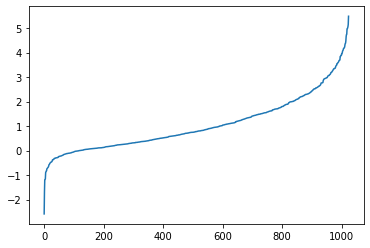

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/StitchHD/baddims.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


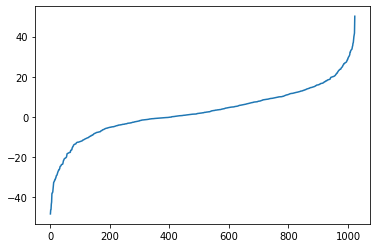

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/StitchHD/baddims.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


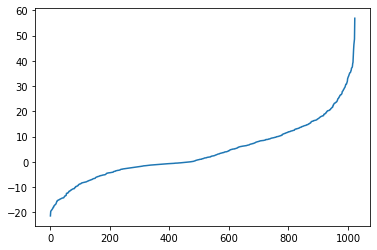

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/StitchHD/baddims.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


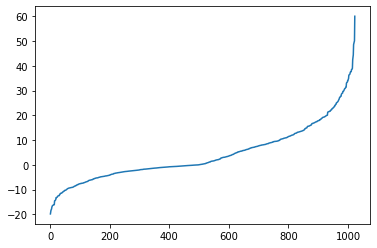

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/StitchHD/baddims.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


9.2650728225708
inference
0.026437044143676758


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/StitchHD/baddims.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


In [3]:
accs=[]
for i in range(0,1):
    model=NeuralHDv2(classes =9, features =257, dim = 1024, batch_size=64,lr=.0001)
    print("training")
    start=time.time()
    model.fit(xtr,ytr,15,4,.1)
    end=time.time()
    print(end-start)
    print("inference")
    start=time.time()
    yhat=model(xte)
    end=time.time()
    print(end-start)
    eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
    acc=sum(eval)/len(transy_test)
    accs.append(acc)

In [16]:
# index=0
# classmetrics=torch.Tensor([(model.encode(xtr[ytr==index])*class_).sum(0).tolist() for class_ in model.classes])[index]
# print(classmetrics)
totalclearance=torch.zeros(model.dimensionality)
for index in range(len(model.classes)):
    classmetrics=torch.Tensor([(model.encode(xtr[ytr==index])*class_).sum(0).tolist() for class_ in model.classes])
    clearance=classmetrics[index]-classmetrics.mean(0)
    totalclearance+=clearance

tensor([33.4867, 14.6028, 24.5498,  ..., -0.5637, -0.2880,  0.0428])
tensor([ 2.2762e+01,  2.8983e+01,  1.3977e+01,  ...,  4.9473e-01,
         1.3250e+00, -1.5686e-02])
tensor([ 9.6764e+00,  3.2855e+01,  3.9142e+01,  ...,  2.4771e-02,
         2.3463e-01, -5.1880e-02])
tensor([ 4.7158e+00,  1.6700e+00,  8.1161e+00,  ..., -7.7660e-03,
         2.2626e-02, -7.6566e-03])
tensor([ 0.2960, -0.0467,  0.6485,  ...,  0.0034,  0.0468,  0.0048])
tensor([16.8634,  9.2461, 10.4265,  ...,  0.0224, -0.1001,  0.0470])
tensor([ 2.2735,  2.3718,  5.8736,  ..., -0.0529, -0.2381, -0.0654])
tensor([16.6536, 17.0187, 22.0423,  ..., -0.1296, -0.3139, -0.1047])
tensor([19.0477,  1.6073, 10.2486,  ...,  0.1612, -0.3771, -0.1048])
tensor([ 0.8229, 30.0796, -2.7588,  ..., -0.0399,  0.3619, -0.2560])


In [4]:
accs

[tensor(0.8933)]

In [5]:
accs

[tensor(0.9234)]

In [4]:
accs

[tensor(0.9209)]

In [6]:
accs

[tensor(0.9190),
 tensor(0.9452),
 tensor(0.9507),
 tensor(0.9474),
 tensor(0.9492)]

In [4]:
accs

[tensor(0.9529),
 tensor(0.9448),
 tensor(0.9496),
 tensor(0.9547),
 tensor(0.9459)]

In [6]:
accs

[tensor(0.9525),
 tensor(0.9507),
 tensor(0.9459),
 tensor(0.9536),
 tensor(0.9547),
 tensor(0.9514),
 tensor(0.9338),
 tensor(0.9510),
 tensor(0.9569),
 tensor(0.9499),
 tensor(0.9544),
 tensor(0.9547),
 tensor(0.9533),
 tensor(0.9525),
 tensor(0.9477),
 tensor(0.9455),
 tensor(0.9389),
 tensor(0.9422),
 tensor(0.9522),
 tensor(0.9492)]

In [5]:
accs

[tensor(0.9488),
 tensor(0.9492),
 tensor(0.9481),
 tensor(0.9452),
 tensor(0.9477),
 tensor(0.9190),
 tensor(0.9510),
 tensor(0.9481),
 tensor(0.9470),
 tensor(0.9514),
 tensor(0.9522),
 tensor(0.9503),
 tensor(0.9470),
 tensor(0.9448),
 tensor(0.9481),
 tensor(0.9411),
 tensor(0.9499),
 tensor(0.9087),
 tensor(0.9400),
 tensor(0.9470)]

In [8]:
np.mean(accs)#minus

0.94955826

In [4]:
np.mean(accs)

0.94424

In [6]:
np.median(accs)

0.9479205

In [ ]:
\